# Lecture 3 - Basic Data Processing with NumPy and Matplotlib

## Overview, Objectives, and Key Terms
 
In this lesson, we'll explore some core features of NumPy and Matplotlib and extend our Python based "calculator" to include processing of *arrays* of data.  [NumPy](http://www.numpy.org/) is the basic numerical package for Python.  A lot of its utility comes from its numerical, multidimensional array type, `ndarray`. Use of these arrays in a *vectorized* way often leads to significantly faster (and much more compact) code.  Moreover, the array-valued results of numerical computations are  easily visualized using Matplotlib, which was originally developed to provide MATLAB-like graphics in the Python environment.   

I think it's so important that students can create, process, and display data that I highlight it early in the course and revisit it throughtout.  NumPy and Matplotlib together provide about the easiest way to work with data.

### Objectives

By the end of this lesson, you should be able to

- *define and manipulate one-dimensional and two-dimensionanal NumPy arrays*
- *produce plots of data following best practices*
- *load data from text files*
- *save data to text files*


### Key Terms

- `numpy`
- `ndarray` 
- `np.array`
- `np.ones`
- `np.zeros`
- `np.linspace`
- `np.sin`
- `np.mean` (or `v.mean` where `v` is of type `ndarray`)
- `max` (or `np.max` or `v.max`)
- `sum` (or `np.sum` or `v.sum`) 
- `matplotlib.pyplot`
- `np.loadtxt`

## NumPy and One-Dimensional Arrays

NumPy is not part of Python, but it is a well-supported package.  It comes by default in the Anaconda distribution, so you should already have it. Like all packages, we can import NumPy via 

In [1]:
import numpy

However, it is far more common to use 

In [2]:
import numpy as np

The difference between these approaches is in how we use the `numpy` module.  Built in to `numpy` are a number of same functions we saw in `math`, e.g., `sin`.  Hence, we could use `numpy.sin(1.0)`, but if we import `numpy` as `np`, we would use `np.sin(1.0)`.  I recommend the latter because (1) it is shorter and (2) most online documentation uses the `np` abbreviation.

> **Note**: Use `import numpy as np` instead of `import numpy`.

### A Motivating Example

Here's a common task easily solved using NumPy: evaluate a
mathematical function `f(x)` at discrete
points.  Why discrete data? Perhaps because that's all the input data 
we have, e.g., from measurements,  or perhaps we're trying to plot that 
function.  In any case, this is where NumPy excels.  Consider the specific
case for which we want to evaluate $f(x) = \sin(x)$
for $x \in [0, 1]$, where `x` is to limited to 10 evenly-spaced
points.  

Here's what we need to do.  First, always make sure NumPy is imported; in this 
notebook, we did that above, but here it is again for completeness.

In [3]:
import numpy as np 

Now, we create an array `x` with 10, evenly-spaced points from 0 to 1
using the function `np.linspace` as follows:

In [4]:
x = np.linspace(0, 1, 10)
x # remember, a variable all by itself as input prints its value as output

array([ 0.        ,  0.11111111,  0.22222222,  0.33333333,  0.44444444,
        0.55555556,  0.66666667,  0.77777778,  0.88888889,  1.        ])

Finally, we evaluate the function `np.sin` at these points.

In [5]:
y = np.sin(x)
y

array([ 0.        ,  0.11088263,  0.22039774,  0.3271947 ,  0.42995636,
        0.52741539,  0.6183698 ,  0.70169788,  0.77637192,  0.84147098])

Note that :code:`np.sin(x)` is used and not `math.sin(x)`.  
That's because :code:`x` in this case is a `ndarray`, to which the
base Python :code:`math` functions do not apply.  

The function `np.linspace(a, b, n)` gives `n` evenly-spaced points starting 
with `a` and ending with `b`.  Writing the equivalent C++ or
Fortran to define such an `x` is a royal pain; that's why Python + 
NumPy (or MATLAB/Octave) is so nice for this type of problem.

### Creating and Manipulating 1-D Arrays

We already saw one way to create a one-dimensional array, i.e., `np.linspace`.  There are many other ways to create these arrays.  Suppose we have a list of numbers, e.g., 1.5, 2.7, and 3.1, and we'd like to make an array filled with these numbers.  That's easy:

In [6]:
a = np.array([1.5, 2.7, 3.1])
a

array([ 1.5,  2.7,  3.1])

(It turns out that `[1.5, 2.7, 3.1]` is actually a Python `list`, but we'll cover those later on when we need them; for now, we'll stick with NumPy arrays exclusively.)

The common ways to make 1-D arrays are listed in the table below.

| function      | example use                     | what it creates creates     | 
|---------------|---------------------------------|-----------------------------|
| `np.array(sequence)`    | `np.array([1.5, 2.7, 3.1])`     | `array([ 1.5,  2.7,  3.1])` |
| `np.linspace(start, stop, num)` | `np.linspace(0, 1, 3)`          | `array([ 0. ,  0.5,  1. ])` |
| `np.ones(shape)`     | `np.ones(3)`                    | `array([ 1.,  1.,  1.])`    |
| `np.zeros(shape)`    | `np.zeros(3)`                   | `array([ 0.,  0.,  0.])`    |
| `np.arange(start, end, step)`   | `np.arange(1, 7, 2)`               | ` array([1, 3, 5])`         |

The table does not tell the whole story of these functions; use `help()` or the `?` mark for further details.

A useful aspect of NumPy arrays is that the basic arithmetic 
operations of Python (think `+` and `*`) apply to such arrays via *vectorized* operations.
For example, two arrays *of equal length* can easily be multiplied:

In [7]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
c = a*b
c

array([ 2,  6, 12])

Individual arrays can also be operated on by arithmetic operaters.  For instance, we could double each element of `a` by doing

In [8]:
d = 2*a
d

array([2, 4, 6])

### Inspecting Arrays and Their Elements

What if we need to get the value of an array element?  For example, suppose, as done above, we doubled the array `a`, called it `d`, and wanted the first value of `d`.  We need to use array `indexing` via the operator `[]`.  Here's how we get that first value of `d`:

In [9]:
d[0]

2

Yes--the first element is accessed using a zero.  Python, like C, C++, and many other languages, is based on *[zero indexing](https://en.wikipedia.org/wiki/Zero-based_numbering)*, in which the numbering of sequences starts with zero.  Get used to it!

> **Warning**: Numbering starts with zero in Python

By using indexing, we can *change* the value of `d[0]`, too, e.g.,

In [10]:
d[0] = 99
d

array([99,  4,  6])

The number of elements in an array can be found in two ways.  First, we can use the built-in `len` function:

In [11]:
len(d)

3

We can also use the `size` *attribute*, associated with any array, that can be accessed through the `.` operator:

In [12]:
d.size

3

What else do arrays have to help us?  Try using `dir`! 

In [13]:
dir(d)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__r

Several names worth pointing out are `dot`, `max`, `mean`, `shape`, and `sum`.  The `max`, `mean`, and `sum` functions have pretty intuitive names (and purposes):

In [14]:
d.max()

99

In [15]:
d.mean() # here, (99+4+6)/3

36.333333333333336

In [16]:
d.sum()

109

It turns out that Python has `max` and `sum` as built-in functions.  Hence, we could instead do

In [17]:
max(d)

99

In [18]:
sum(d)

109

but not `mean(d)` because `mean` is not a built-in function.  However, `mean` *is* a NumPy function, so we could do

In [21]:
np.mean(d)

36.333333333333336

There is no real difference between `d.mean()` and `np.mean(d)`.  My own personal preference is the latter because it looks closer to the programming I first learned eons ago.

The `shape` attribute is somewhat special; here it is for `d`:

In [22]:
d.shape

(3,)

Here, the shape indicates a purely one-dimensional array.  We'll see that `shape` is a bit more interesting for two-dimensional arrays.

## Diving into `pyplot`

Recall our motivating example: defined `x` at evenly spaced points, and evaluate `np.sin` at those points.  We printed the points and the function at those points, but it's often useful to *show* it via a graph.  [Matplotlib](https://matplotlib.org) gives us the tools to do just that.  The most common way to import Matplotlib (and, specifically, its `pyplot` "submodule") is via

In [23]:
import matplotlib.pyplot as plt

> **Note**: Just like NumPy is often shorted to `np`, `matplotlib.pyplot` is often used as `plt`.  

The most basic plot is very easy to make using `plt.plot`:

In [24]:
plt.plot(x, y) # x and y were defined above

To show the plot, we need to use `plt.show`:

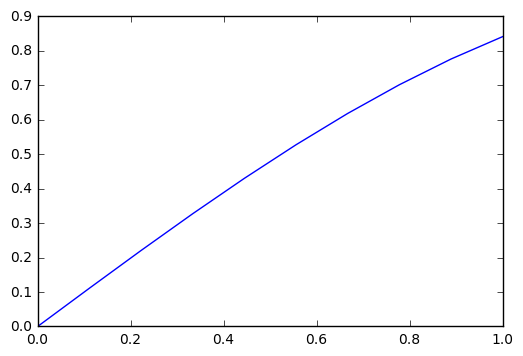

In [25]:
plt.show()

### Multiple Curves and Best Practices

What about multiple curves?  Let's define a second curved equal to `np.cos` evaluated at `x`:

In [26]:
z = np.cos(x)

To plot both `y` and `z` is also easy, and here, I've added a couple extra features that define the basic ingredients needed for a good plot:

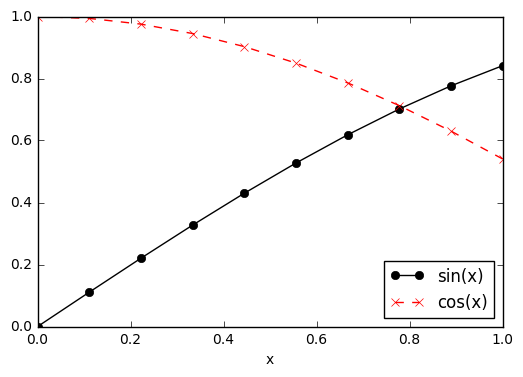

In [29]:
plt.plot(x, y, 'k-o', x, z, 'r--x')
plt.legend(['sin(x)', 'cos(x)'], loc=0)
plt.xlabel('x')
plt.show()

Let's breakdown the new components.  First, consider `x, y, 'k-o'`.  That means `y` is to be plotted against `x`, and the line to be used is black (the `k`), a solid line (the `-`), and has circle markers (the `o`).  The second curve is defined by `x, z, 'r--x'`.  Here, that plots `z` against `x` with a red (the `r`), dashed (the `--`) line with x's as markers (the `x`).  A *legend* is provided indicating which line is which.  The format of the legend always has a sequence of `str` labels for each line enclosed in `[]`'s (again, that's a `list` in Python, but just follow the syntax for now.  By setting `loc=0`, we're putting the legend in the best possible place to avoid overlapping with the curves displayed.  As a baseline rule, any plot produced should contain an `xlabel` and either a `ylabel` (if a single curve) or a `legend` (if multiple curves).

> **Note**: All plots should include appropriate axis labels and legends.

Some of the available colors, line styles, and markers available in `plt.plot` are summarized in the tables below.

| symbol      | color     | 
|-------------|-----------|
| `k`         | black     |
| `b`         | blue      |
| `r`         | red       |
| `g`         | green     |
| `c`         | cyan      |
| `m`         | magenta   |

| symbol      | style     | 
|-------------|-----------|
| `-`         | solid     |
| `--`        | dash-dash |
| `-.`        | dash-dot  |
| `:`         | dot-dot   |

| symbol      | marker    | 
|-------------|-----------|
| `o`         | circle    |
| `x`         | x         |
| `^`         | triangle pointed up  |
| `>`         | triangle pointed right  |
| `s`         | square  |
| `h`         | hexagon  |







In some applications, it can be very important to use a combination of colors, line styles, and markers that produce good looking and easily read graphics when viewed in color and in black and white formats.  

> **Note**: Choose good colors, line styles, and markers to ensure excellent contrast in all media.

## Data Input and Output via NumPy

For many problems, the data we need to process lives in a file outside our Python code.  There are a variety of ways to load data, but NumPy provides an easy way to load data that is in a relatively simple format.  Consider a text file that has the following data:

```
time (s)   vel (m/s)  acc (m/s**2)
0.00000000 1.00000000 0.00000000
0.22222222 1.24884887 0.01097394
0.44444444 1.55962350 0.08779150
0.66666667 1.94773404 0.29629630
0.88888889 2.43242545 0.70233196
1.11111111 3.03773178 1.37174211
1.33333333 3.79366789 2.37037037
1.55555556 4.73771786 3.76406036
1.77777778 5.91669359 5.61865569
2.00000000 7.38905610 8.00000000
```

The structure is simple: three columns separated by white space.  The first row contains information about what the data represent.  Here, the columns correspond to times at which the velocity and acceleration of some object are given.  

Go ahead and save this text in a file.  Mine is called `data.txt`.  To load this file, we'll use `np.loadtxt`.  The basic use of this function is just `np.loadtxt(filename)`, where `filename` is a `str` that contains the name of the file.  Here, we need just a bit more.  In particular, we need tell NumPy to skip the very first row since it contains regular text and not the numbers of interest.  Here's one way to read in that text: 

In [38]:
data = np.loadtxt('data.txt', skiprows=1)
data

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.22222222,  1.24884887,  0.01097394],
       [ 0.44444444,  1.5596235 ,  0.0877915 ],
       [ 0.66666667,  1.94773404,  0.2962963 ],
       [ 0.88888889,  2.43242545,  0.70233196],
       [ 1.11111111,  3.03773178,  1.37174211],
       [ 1.33333333,  3.79366789,  2.37037037],
       [ 1.55555556,  4.73771786,  3.76406036],
       [ 1.77777778,  5.91669359,  5.61865569],
       [ 2.        ,  7.3890561 ,  8.        ]])

We have the data stored in the variable `data`.  The type looks like an `ndarray`, but the structure is more like a matrix, i.e., a two-dimensional array---and it is!  We can try out the `shape` attribute again:

In [39]:
data.shape

(10, 3)

That makes sense: we had 10 times at which the velocity and acceleration were provided.  10 rows, and 3 columns.  We'll see next time how to access entire rows and columns of multidimensional arrays, but there is a better way to load in this data directly into three meaningful variables `t`, `v`, and `a`.  

In [42]:
t, v, a = np.loadtxt('data.txt', skiprows=1, unpack=True)
t

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

Now, we've got the times, velocities, and accelerations as three, separate, one-dimensional arrays.  With NumPy, loading this sort of data is easy and recommended.

> **Note**: If data is numerical and stored in a simple, collimated format, use `np.loadtxt`

We can save the same data back to file.